## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2021.

# Assignment 1, Task 2: Multilayer Perceptron (MLP)
You will get to know how to build basic fully connected neural network.

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import time
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

## Load Data

In [2]:
# Load the raw Fashion-MNIST data.
train, test = fashion_mnist.load_data()

X_train_raw, y_train = train
X_test_raw, y_test = test

X_train = X_train_raw.reshape((X_train_raw.shape[0], X_train_raw.shape[1]**2))
X_test = X_test_raw.reshape((X_test_raw.shape[0], X_test_raw.shape[1]**2))

# Data organizations:
# Train data: 49000 samples from original train set: 1~49,000
# Validation data: 1000 samples from original train set: 49,000~50,000
# Test data: 10000 samples from original test set: 1~10,000
# Development data (for gradient check): 100 from the train set: 1~49,000
num_training = 49000
num_validation = 1000
num_dev = 100

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data
mean_image = np.mean(X_train, axis=0)

X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image
X_test = X_test.astype(np.float32) - mean_image
X_dev = X_dev.astype(np.float32) - mean_image

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape:', X_dev.shape)
print('Development data shape', y_dev.shape)

(49000, 784) (1000, 784) (10000, 784) (100, 784)
Train data shape:  (49000, 784)
Train labels shape:  (49000,)
Validation data shape:  (1000, 784)
Validation labels shape:  (1000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)
Development data shape: (100, 784)
Development data shape (100,)


## Part 1: Basic layers
In this part, all the functions will be created from scratch using numpy for better understanding. (In the next task, you will be introduced to built in layers from TensorFlow.)

### Create basic layer functions

<span style="color:red"><strong>TODO</strong></span>: Complete functions **affine_forward**, **affine_backward** in **./utils/layer_funcs.py**.

<span style="color:red"><strong>NOTE</strong></span>: Please do not change the code in the cell below, The cell below will run correctly if your code is right.

In [3]:
# THE FOLLOWING IS THE VERIFICATION CODE     #
# DO NOT CHANGE IT.                        #

from utils.layer_funcs import affine_forward
from utils.layer_funcs import affine_backward

# generate data for checking
x = X_dev
w = np.random.rand(x.shape[1],100)
b = np.random.rand(100)
dout = np.ones((x.shape[0],100))

## Affine function: H = W*X + b
out = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, x, w, b)

## check your implementation using the tf.gradients_function()
x_tf = tf.Variable(x, name='x')
w_tf = tf.Variable(w, name='w')
b_tf = tf.Variable(b, name='b')

def affine_layer(x, w, b):
    return tf.matmul(x, w) + b

with tf.GradientTape() as tape:
    tape.watch(w_tf)
    out_tf = affine_layer(x_tf, w_tf, b_tf)
    dx_tf, dw_tf, db_tf = tape.gradient(out_tf, (x_tf, w_tf, b_tf))

out_check = out_tf.numpy()
dx_check, dw_check, db_check = dx_tf.numpy(), dw_tf.numpy(), db_tf.numpy()

## Print validation results
print("Is out correct? {}".format(np.allclose(out, out_check)))
print("Is dx correct? {}".format(np.allclose(dx, dx_check)))
print("Is dw correct? {}".format(np.allclose(dw, dw_check)))
print("Is db correct? {}".format(np.allclose(db, db_check)))

Is out correct? True
Is dx correct? True
Is dw correct? True
Is db correct? True


<span style="color:red"><strong>TODO</strong></span>: Complete functions **relu_forward**, **relu_backward** in **./utils/layer_funcs.py**.


<span style="color:red"><strong>NOTE</strong></span>: Please do not change the code in the cell below, The cell below will run correctly if your code is right.

In [4]:
# THE FOLLOWING IS THE VERIFICATION CODE     #
# DO NOT CHANGE IT.                        #

from utils.layer_funcs import relu_forward
from utils.layer_funcs import relu_backward

## Activation layers -- Here we introduce ReLU activation function
## since it is the most commonly used in computer vision problems.
## However, you can also try to implement 
## other activation functions like sigmoid, tanh etc.
x = X_dev
dout = np.ones(x.shape)

## ReLU
out = relu_forward(x)
dx = relu_backward(dout, x)

## check by tf.GradientTape.gradients()
x_tf = tf.Variable(x, name='x')
with tf.GradientTape() as tape:
    tape.watch(x_tf)
    out_tf = tf.nn.relu(x_tf)
    grad_gt = tape.gradient(out_tf, x_tf)

out_check = out_tf.numpy()
dx_check = grad_gt.numpy()
## Print validation result
print("Is out correct? {}".format(np.allclose(out, out_check)))
print("Is dx correct? {}".format(np.allclose(dx, dx_check)))

Is out correct? True
Is dx correct? True


<span style="color:red"><strong>TODO</strong></span>: Complete functions **softmax_loss** in **./utils/layer_funcs.py**

<span style="color:red"><strong>NOTE</strong></span>: Please do not change the code in the cell below, The cell below will run correctly if your code is right.

In [ ]:
# THE FOLLOWING CODE IS JUST FOR CHECKING.     #
# NO NEED TO CHANGE IT.                        #

from utils.layer_funcs import softmax_loss

## generate some random data for testing
x = np.random.rand(100,20)
y = np.argmax(x, axis=1)

loss, dx = softmax_loss(x, y)

## check by tf.GradientTape.gradients()

x_tf = tf.Variable(x, name='x')
y_tf = tf.Variable(y, name='y')

with tf.GradientTape() as tape:
    tape.watch(x_tf)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= x_tf, labels=tf.one_hot(y_tf,20))
    loss_tf = tf.reduce_mean(cross_entropy)
    dx_tf = tape.gradient(loss_tf, x_tf)

loss_check = loss_tf.numpy()
dx_check = dx_tf.numpy()
## Print validation result
print("Is loss correct? {}".format(np.allclose(loss, loss_check)))
print("Is dx correct? {}".format(np.allclose(dx, dx_check)))

### Create a single layer

Combine an affine function and a nonlinear activation function into a single fully-connected layer. Edit the code in ./utils/layer_utils.py

$$\mathbf{O} = activation(\mathbf{W} \times \mathbf{X} + \mathbf{b})$$

For this assignment, you need to create two types of layers as below. You can get started with the skeleton code in ./utils/layer_utils.py. The basic class structure has been provided, and you need to fill in the "TODO" part(s). 

* DenseLayer -- Affine transform >> ReLU
```
Class DenseLayer:
    Variables: weights, bias 
    Functions: 
        __init__: given (input_dim, output_dim, weight_scale)
        feedforward: TODO
        backforward: TODO      
```    
* AffineLayer -- Affine transform and the class structure is similar to DenseLayer

<span style="color:red"><strong>TODO</strong></span>: Complete function **AffineLayer** in **./utils/layer_utils.py**

<span style="color:red"><strong>NOTE</strong></span>: Please do not change the code in the cell below, The cell below will run correctly if your code is right.

In [5]:
# THE FOLLOWING IS THE VERIFICATION CODE     #
# DO NOT CHANGE IT.                        #

from utils.layer_utils import AffineLayer

## Affine
test_affine = AffineLayer(input_dim=X_train.shape[1],output_dim=100)
w, b = test_affine.params

## Data for correctness check
x = X_dev
dout = np.ones((x.shape[0], 100))

out = test_affine.feedforward(x)
dx = test_affine.backward(dout)
dw, db = test_affine.gradients

## check by tf.GradientTape.gradients()
x_tf = tf.Variable(x, name='x')
w_tf = tf.Variable(w, name='w')
b_tf = tf.Variable(b, name='b')

def affine_layer(x, w, b):
    return tf.matmul(x, w) + b

with tf.GradientTape() as tape:
    tape.watch(w_tf)
    out_tf = affine_layer(x_tf, w_tf, b_tf)
    dx_tf, dw_tf, db_tf = tape.gradient(out_tf, (x_tf, w_tf, b_tf))
    
out_check = out_tf.numpy()
dx_check = dx_tf.numpy()
dw_check = dw_tf.numpy()
db_check = db_tf.numpy()

## Print validation result
print("Is out correct? {}".format(np.allclose(out, out_check)))
print("Is dx correct? {}".format(np.allclose(dx, dx_check)))
print("Is dw correct? {}".format(np.allclose(dw, dw_check)))
print("Is db correct? {}".format(np.allclose(db, db_check)))

Is out correct? True
Is dx correct? True
Is dw correct? True
Is db correct? True


<span style="color:red"><strong>TODO</strong></span>: Complete function **DenseLayer** in **./utils/layer_utils.py**

<span style="color:red"><strong>NOTE</strong></span>: Please do not change the code in the cell below, The cell below will run correctly if your code is right.

In [6]:
# THE FOLLOWING IS THE VERIFICATION CODE     #
# DO NOT CHANGE IT.                        #

## First, let's make a dense layer
from utils.layer_utils import DenseLayer

## Affine + ReLU
test_dense = DenseLayer(input_dim=X_train.shape[1],output_dim=100)
w, b = test_dense.params

## Data for correctness check
x = X_dev
dout = np.ones((x.shape[0], 100))

out = test_dense.feedforward(x)
dx = test_dense.backward(dout)
dw, db = test_dense.gradients

## check by tf.GradientTape.gradients()
x_tf = tf.Variable(x, name='x')
w_tf = tf.Variable(w, name='w')
b_tf = tf.Variable(b, name='b')

def dense_layer(x, w, b):
    return tf.nn.relu(tf.matmul(x, w) + b)

with tf.GradientTape() as tape:
    tape.watch(w_tf)
    out_tf = dense_layer(x_tf, w_tf, b_tf)
    dx_tf, dw_tf, db_tf = tape.gradient(out_tf, (x_tf, w_tf, b_tf))
    
out_check = out_tf.numpy()
dx_check = dx_tf.numpy()
dw_check = dw_tf.numpy()
db_check = db_tf.numpy()

## Print validation result
print("Is out correct? {}".format(np.allclose(out, out_check)))
print("Is dx correct? {}".format(np.allclose(dx, dx_check)))
print("Is dw correct? {}".format(np.allclose(dw, dw_check)))
print("Is db correct? {}".format(np.allclose(db, db_check)))

Is out correct? True
Is dx correct? True
Is dw correct? True
Is db correct? True


## Part 2: Two Layer Network

Complete the class **TwoLayerNet** in **./utils/classifiers/twolayernet.py**. Through this experiment, you will create a two-layer neural network and learn about the backpropagation mechanism. The network structure is like **input >> DenseLayer >> AffineLayer >> softmax loss >> output**. Complete "TODO" part(s).
```
Class TwoLayerNet:   
    Functions: 
        __init__: GIVEN
        loss: TODO - calculate cross entropy loss and gradients wst all weights and bias.
        step: TODO - a single update all weights and bias by SGD.
        predict: TODO - output result(classification accuracy) based on input data
    
    Variables:
        layers
```

<span style="color:red"><strong>TODO</strong></span>: Complete class **TwoLayerNet** in **./utils/classifiers/twolayernet.py**

<span style="color:red"><strong>NOTE</strong></span>: Please do not change the code in the cell below, The cell below will run correctly if your code is right.

In [7]:
# THE FOLLOWING IS THE VERIFICATION CODE     #
# DO NOT CHANGE IT.                        #

from utils.classifiers.twolayernet import TwoLayerNet

## Define a model
model = TwoLayerNet(input_dim=X_train.shape[1], hidden_dim=100, num_classes=10, reg=1e-4)
W1, b1 = model.layer1.params
W2, b2 = model.layer2.params
## Backprogation -- Finish loss function and gradients calculation in TwoLayerNet
loss = model.loss(X_dev, y_dev)

## Check loss by tensorflow
x_tf = tf.Variable(X_dev, dtype = tf.float32)
y_tf = tf.Variable(y_dev, dtype = tf.uint8)

W1_tf = tf.Variable(W1.astype('float32'))
b1_tf = tf.Variable(b1.astype('float32'))
W2_tf = tf.Variable(W2.astype('float32'))
b2_tf = tf.Variable(b2.astype('float32'))
h1_tf = tf.nn.relu(tf.matmul(x_tf, W1_tf))
h2_tf = tf.matmul(h1_tf, W2_tf) + b2_tf
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= h2_tf, labels=tf.one_hot(y_tf,10))
L2_loss = tf.nn.l2_loss(W1_tf) + tf.nn.l2_loss(W2_tf)
loss_tf = tf.reduce_mean(cross_entropy) + 1e-4 * L2_loss 

loss_check=loss_tf.numpy()
    
## Print validation result
print("Is loss correct? {}".format(np.allclose(loss, loss_check)))

Is loss correct? True


### Train a two-layer network

#### Import functions for training and testing

In [8]:
from utils.train_funcs import train, test

#### Start training
We have provide you the **train( )** function in **./utils/train_func.py**

In [9]:
# THE FOLLOWING IS THE VERIFICATION CODE     #
# DO NOT CHANGE IT.                        #

from utils.classifiers.twolayernet import TwoLayerNet

## TODO: Use previous layers to create a two layer neural network
## input->(affine->activation)->(affine->softmax)->output
## The recommended activation function is ReLU. And you can 
## also make a comparison with other activation function to see
## any difference.
model = TwoLayerNet(input_dim=X_train.shape[1], hidden_dim=400, num_classes=10, reg=1e-4, weight_scale=1e-3)

num_epoch = 10
batch_size = 500
lr = 5e-4
verbose = True
train_acc_hist, val_acc_hist = train(model, X_train, y_train, X_val, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X_test, y_test)

number of batches for training: 98
5000/49000 loss: 2.342357135931888
10000/49000 loss: 2.514511112764364
15000/49000 loss: 2.2101937684014445
20000/49000 loss: 2.1043316237737235
25000/49000 loss: 1.9403375899024458
30000/49000 loss: 1.8100557308378353
35000/49000 loss: 1.7382349831309174
40000/49000 loss: 1.4752980509295432
45000/49000 loss: 1.4108401280007503
epoch 1: valid acc = 0.544, new learning rate = 0.000475
5000/49000 loss: 1.175878855864377
10000/49000 loss: 1.1959778281072935
15000/49000 loss: 1.0553730784448396
20000/49000 loss: 1.0545960919243356
25000/49000 loss: 0.9500517228108836
30000/49000 loss: 1.0023972981678506
35000/49000 loss: 0.9007516220372568
40000/49000 loss: 0.9395199536209363
45000/49000 loss: 0.8106059661967306
epoch 2: valid acc = 0.697, new learning rate = 0.00045125
5000/49000 loss: 0.847698832268671
10000/49000 loss: 0.7614074518807569
15000/49000 loss: 0.7939813095470423
20000/49000 loss: 0.7615797499524847
25000/49000 loss: 0.7626757237009604
30000

0.8305

<span style="color:red"><strong>TODO</strong></span>: Plot training and validation accuracy history of each epoch

<span style="color:red"><strong>Solution</strong></span>:

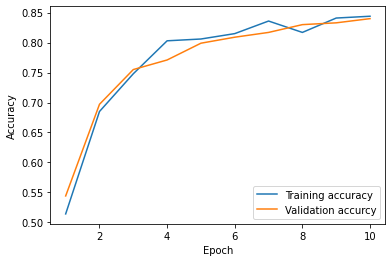

In [10]:
epo = [i for i in range(1, num_epoch+1)]
plt.plot(epo, train_acc_hist, label = 'Training accuracy')
plt.plot(epo, val_acc_hist, label = 'Validation accurcy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Visulize the weight variable in the first layer.

Visualization of the intermediate weights can help you get an intuitive understanding of how the network works, especially in  Convolutional Neural Networks (CNNs).

In [11]:
from utils.display_funcs import visualize_pics

num of feature vectors: 400


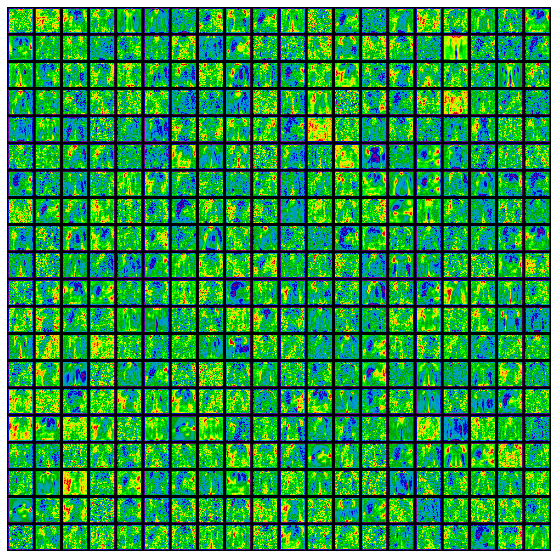

In [12]:
weights = model.layer1.params[0]
pics = weights.reshape(1, X_train_raw.shape[1], X_train_raw.shape[2], -1).transpose(3, 1, 2, 0)
## visualization
visualize_pics(pics, cmap='nipy_spectral')

### Get test accuracy greater than 80%

For this part, you need to train a better two-layer net. The requirement is to get test accuracy better than 35%. If your accuracy is lower, for each 1% lower than 35%, you will lose 1 point (There are totally 10 points for this part).

Here are some recommended methods for improving the performance. Feel free to try any other method as you see fit.

1. Hyperparameter tuning: reg, hidden_dim, lr, learning_decay, num_epoch, batch_size, weight_scale.
2. Adjust training strategy: Randomly select a batch of samples rather than selecting them orderly. 
3. Try new optimization methods: Now we are using SGD, you can try SGD with momentum, adam, etc.
4. Early-stopping.
5. Good (better) initial values for weights in the model.

A comparison between SGD and SGD with momentum.

* Stochastic gradient descent - SGD
    ```
    w = w - learning_rate * gradient 
    ```
* SGD with momentum
    ```
    v = momentum*v + learning_rate * gradient
    w = w - v
    ```

<span style="color:red"><strong>TODO</strong></span>: See below

In [13]:
from utils.classifiers.twolayernet import TwoLayerNet
# TODO: Use previous layers to create a two layer neural network.
# Try several solutions and report the best performing one.
# input->(affine->activation)->(affine->softmax)->output
# The recommended activation function is ReLU. You can 
# make a comparison with other activation functions to see
# the differences.
#
# You will need to execute code similar to the code below, using your parameter specs:
#    model = TwoLayerNet(input_dim=TBD, hidden_dim=TBD, num_classes=TBD, reg=TBD, weight_scale=TBD)
#    num_epoch = TBD
#    batch_size = TBD
#    lr = TBD
#    verbose = TBD
#    train_acc_hist, val_acc_hist = train(TBD)
#    test(TBD, TBD, TBD)

<span style="color:red"><strong>Solution</strong></span>:

In [14]:
'''
param_list = {
    'num_epoch': [10, 15, 20, 25],
    'hidden_dim': [300, 400, 500, 600],
    'batch_size': [300, 400, 500, 600],
    'lr': [1e-4, 2e-4, 5e-4, 1e-3],
    'momentum': [0.5, 0.1, 0.05]
}

best_param_list={
    'test acc': 0,
    'num_epoch': 0,
    'hidden_dim': 0,
    'batch_size': 0,
    'lr': 0,
    'momentum': 0,
}
for num_epoch in param_list['num_epoch']:
    for hidden_dim in param_list['hidden_dim']:
        for batch_size in param_list['batch_size']:
            for lr in param_list['lr']:
                for momentum in param_list['momentum']:
                    model = TwoLayerNet(input_dim=X_train.shape[1], hidden_dim=hidden_dim, num_classes=10, reg=1e-4, weight_scale=1e-3)
                    verbose = True
                    train_acc_hist, val_acc_hist = train(model, X_train, y_train, X_val, y_val, 
                                                          num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, 
                                                            optim='SGD Momentum', momentum=momentum, verbose=verbose)
                    test_score = test(model, X_test, y_test)
                    if test_score > best_param_list['test acc']:
                        best_param_list['test acc'] = test_score
                        best_param_list['num_epoch'] = num_epoch
                        best_param_list['hidden_dim'] = hidden_dim
                        best_param_list['batch_size'] = batch_size
                        best_param_list['lr'] = lr
                        best_param_list['momentum'] = momentum
print(best_param_list)
'''
model = TwoLayerNet(input_dim=X_train.shape[1], hidden_dim=300, num_classes=10, reg=1e-4, weight_scale=1e-3)

num_epoch = 20
batch_size = 300
lr = 1e-3
momentum = 0.1
verbose = True
train_acc_hist, val_acc_hist = train(model, X_train, y_train, X_val, y_val, 
                num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr,
                optim='SGD Momentum', momentum=momentum, verbose=verbose)
test(model, X_test, y_test)

number of batches for training: 163


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


3000/49000 loss: 2.3835284278456768
6000/49000 loss: 1.9151593991564555
9000/49000 loss: 1.7862795821357595
12000/49000 loss: 1.6523992869240232
15000/49000 loss: 1.2228858249118308
18000/49000 loss: 1.1360108244554
21000/49000 loss: 1.0494403499820746
24000/49000 loss: 0.9369275621683686
27000/49000 loss: 0.8134415387205951
30000/49000 loss: 0.8627224551887321
33000/49000 loss: 0.6935865605666955
36000/49000 loss: 0.6750435838543807
39000/49000 loss: 0.8435844550967415
42000/49000 loss: 0.7256252023323869
45000/49000 loss: 0.6435635231298725
48000/49000 loss: 0.5669378053114832
epoch 1: valid acc = 0.767, new learning rate = 0.00095
3000/49000 loss: 0.6201716024459464
6000/49000 loss: 0.49078612075395034
9000/49000 loss: 0.49652524615093874
12000/49000 loss: 0.5637323608684544
15000/49000 loss: 0.5645413497025086
18000/49000 loss: 0.4520575413073935
21000/49000 loss: 0.5382412967327959
24000/49000 loss: 0.47477872990305303
27000/49000 loss: 0.5185727139587626
30000/49000 loss: 0.45666

24000/49000 loss: 0.2882564138420124
27000/49000 loss: 0.34049211474409097
30000/49000 loss: 0.31489966079048903
33000/49000 loss: 0.3979974826405973
36000/49000 loss: 0.3059191590145873
39000/49000 loss: 0.290652087600541
42000/49000 loss: 0.3129831888856585
45000/49000 loss: 0.3188271277787552
48000/49000 loss: 0.2747962429046218
epoch 13: valid acc = 0.888, new learning rate = 0.0005133420832795047
3000/49000 loss: 0.3603713974749366
6000/49000 loss: 0.3149667524377495
9000/49000 loss: 0.30586863706611467
12000/49000 loss: 0.32038634372881536
15000/49000 loss: 0.31159191999170605
18000/49000 loss: 0.34369495896027796
21000/49000 loss: 0.27005400911045313
24000/49000 loss: 0.29290282290879
27000/49000 loss: 0.25607526632740274
30000/49000 loss: 0.28502391913794306
33000/49000 loss: 0.2829155517615891
36000/49000 loss: 0.3306233469549911
39000/49000 loss: 0.3906522874820101
42000/49000 loss: 0.3021013038699478
45000/49000 loss: 0.2830416421043101
48000/49000 loss: 0.330704035861658
ep

0.8714

#### <span style="color:red"><strong>TODO</strong></span>: Show your best results, including training plot of accuracy and loss and a visualization of weights.

<span style="color:red"><strong>Solution</strong></span>:

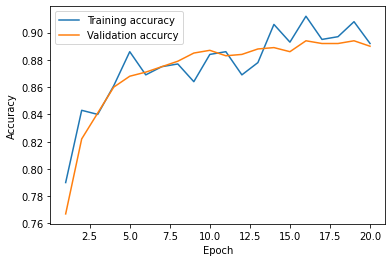

In [15]:
# training and accuracy plot
epo = [i for i in range(1, num_epoch+1)]
plt.plot(epo, train_acc_hist, label = 'Training accuracy')
plt.plot(epo, val_acc_hist, label = 'Validation accurcy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

num of feature vectors: 300


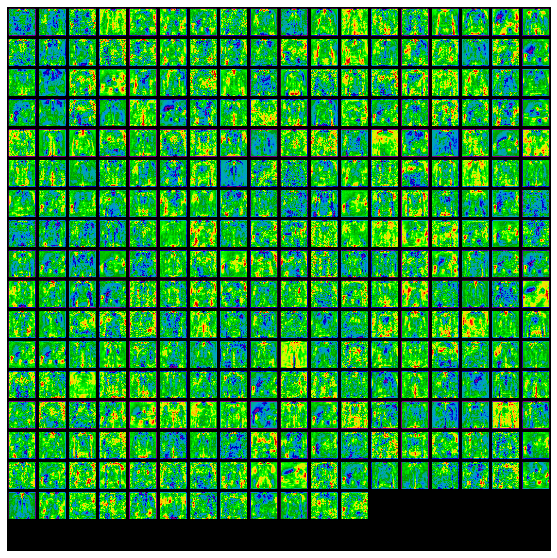

In [16]:
# visualize weights
weights = model.layer1.params[0]
pics = weights.reshape(1, X_train_raw.shape[1], X_train_raw.shape[2], -1).transpose(3, 1, 2, 0)
## visualization
visualize_pics(pics, cmap='nipy_spectral')

### Save your best model in a dictionary 

In [17]:
## Create "save_model" folder if it does not exist
save_dir = "./save_models/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

## Save your model
save_params = model.save_model()
with open("./save_models/best_model.pkl", "wb") as output_file:
    pickle.dump(save_params, output_file)

In [18]:
## Load your model
#with open("./save_models/best_model.pkl", "rb") as input_file:
#    load_params = pickle.load(input_file)
    
#model.update_model(load_params)

## Part 3: Multilayer Network

Complete the class **MLP** in **./utils/classifiers/network.py**. It should allow arbitrary settings for the number of hidden layers as well as the number of hidden neurons in each layer. **MLP** has a similar structure as a **TwoLayerNet** network.

```
class MLP:
    functions: __init__, loss, step, predict, check_accuracy
    variables: layers
```

<span style="color:red"><strong>TODO</strong></span>: Complete the class **MLP** in **./utils/classifiers/mlp.py**

<span style="color:red"><strong>NOTE</strong></span>: Please do not change the code in the cell below, The cell below will run correctly if your code is right.

In [19]:
# THE FOLLOWING IS THE VERIFICATION CODE     #
# DO NOT CHANGE IT.                          #

from utils.classifiers.mlp import MLP

## Use a sequence of layers to create a multiple layer neural network
## input->(affine->activation)-> ... ->(affine->activation)->(affine->softmax)->output
model = MLP(input_dim=X_train.shape[1], hidden_dims=[100, 100], num_classes=20, reg=0.1, weight_scale=1e-3)

num_epoch = 10
batch_size = 100
lr = 1e-2
verbose = False
train_acc_hist, val_acc_hist = train(model, X_train, y_train, X_val, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X_test, y_test)

number of batches for training: 490
epoch 1: valid acc = 0.83, new learning rate = 0.0095
epoch 2: valid acc = 0.859, new learning rate = 0.009025
epoch 3: valid acc = 0.854, new learning rate = 0.00857375
epoch 4: valid acc = 0.865, new learning rate = 0.0081450625
epoch 5: valid acc = 0.853, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.878, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.86, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.881, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.875, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.885, new learning rate = 0.005987369392383786
test acc: 0.8774


0.8774

<span style="color:red"><strong>TODO</strong></span>: Plot training and validation accuracy history of each epoch

<span style="color:red"><strong>Solution</strong></span>:

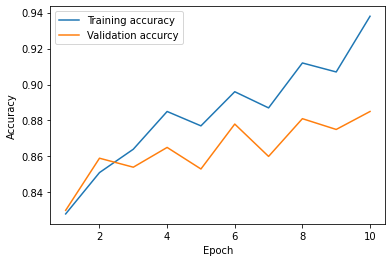

In [20]:
#TODO: plot training and validation accuracy
epo = [i for i in range(1, num_epoch+1)]
plt.plot(epo, train_acc_hist, label = 'Training accuracy')
plt.plot(epo, val_acc_hist, label = 'Validation accurcy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()